## <u> Load MNIST DATA</u>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Location of dataset
dtrain = pd.read_csv(r"Datasets\digit-recognizer\train.csv")

print("Shape of Training Data = ", dtrain.shape)

print("Column name = ", dtrain.columns)

#Print top 5 Values
print("\n\n Top 5 Values = \n\n ",dtrain.head(5))



Shape of Training Data =  (42000, 785)
Column name =  Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


 Top 5 Values = 

     label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...    

In [4]:
#Store all the labels in different list
labels = dtrain["label"]

#Store all the pixels in different list
#dtrain.loc[:, df.columns != 'label']
pixels=dtrain.drop("label",axis=1)

print("Shape of Labels = ", labels.shape)
print("Shape of Pixels = ", pixels.shape)

#Pixels contains 784 columns which corresponds to 28*28 dim of image

Shape of Labels =  (42000,)
Shape of Pixels =  (42000, 784)


label=  9


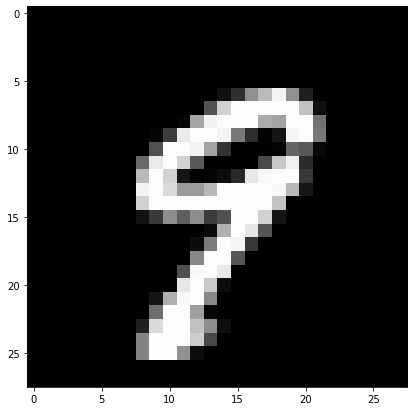

In [5]:
# display or plot a number.
plt.figure(figsize=(7,7))

index = 11

print("label= ", labels[index])

# reshape from 1d to 2d pixel array of dim 28x28
grid_data = pixels.iloc[index].to_numpy().reshape(28,28)

plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

## <u> 2D Visualization using PCA

In [6]:
#Data-Preprocessing : -Standardizing the data

from sklearn.preprocessing import StandardScaler
std_pixels = StandardScaler().fit_transform(pixels)
print(std_pixels.shape)


(42000, 784)


In [7]:
# Finding Co-variance matrix which is (A^T * A)/n
# Matrix Multiplication using Numpy

cov_matrix = np.matmul(std_pixels.T,std_pixels)/pixels.shape[0]

print("The shape of variance Matrix = ",cov_matrix.shape)

The shape of variance Matrix =  (784, 784)


In [8]:
# Finding EIGEN values and EIGEN Vectors

from scipy.linalg import eigh

# We Can also use within eig function
# It will give us Top 2 Eigen values& Vectors.
# IMP - eigh returns Eigen Values&vectors in Ascending order.

E_values, E_vectors = eigh(cov_matrix,eigvals= (782,783))
print("Shape of Eigen Values = ", E_values.shape)
print("Initially Shape of Eigen Vectors",E_vectors.shape)


#As initally we had 784 columns and rows for that notation we will invert E_values to that format
E_vectors = E_vectors.T
print("Finally Shape of Eigen Vectors",E_vectors.shape)

#  IMP - As eig returns Eigen Vectors in Ascending order so, after transpose 
#          1st Column becomes 1st row or essentially 2nd PC Vector
#          2nd Column becomes 2nd row or essentially 1st PC vector
#
#          so, E_vectors[0] = 2nd PC vector
#             E_vectors[1] = 1st PC vector 

Shape of Eigen Values =  (2,)
Initially Shape of Eigen Vectors (784, 2)
Finally Shape of Eigen Vectors (2, 784)


In [9]:
# Using the Eigen Vectors to transform the Original data to new space
# projecting the original data sample on the plane formed by two principal eigen vectors

new_coordinates = np.matmul(E_vectors, std_pixels.T)

print (" resultanat new data points' shape ", E_vectors.shape, "X", std_pixels.T.shape," = ", new_coordinates.shape)

 resultanat new data points' shape  (2, 784) X (784, 42000)  =  (2, 42000)


In [10]:
#Appending LABEL to the 2d projected data
new_coordinates = np.vstack((new_coordinates,labels))
print(new_coordinates.shape)

#transpose it to make 42000 rows
new_coordinates=new_coordinates.T
print("New Shape = ", new_coordinates.shape)

(3, 42000)
New Shape =  (42000, 3)


In [11]:
# CREATING A NEW DATAFRAME for plotting points
data=pd.DataFrame(data=new_coordinates,columns=("2nd_principal", "1st_principal", "label"))
print(data.head())

   2nd_principal  1st_principal  label
0      -5.226445      -5.140478    1.0
1       6.032996      19.292332    0.0
2      -1.705813      -7.644503    1.0
3       5.836139      -0.474207    4.0
4       6.024818      26.559574    0.0


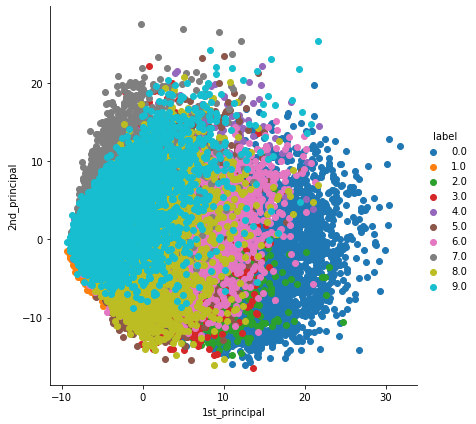

In [12]:
import seaborn as sn

sn.FacetGrid(data, hue="label", height=6).map(plt.scatter, "1st_principal", "2nd_principal").add_legend()
plt.show()

## <u> PCA using Scikit Learn (PC =2)

In [13]:
# Initializing PCA
from sklearn import decomposition
pca=decomposition.PCA()

In [14]:
# configuring the parameteres
# the number of components = 2

pca.n_components = 2
pca_pixels = pca.fit_transform(std_pixels)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_pixels.shape)



shape of pca_reduced.shape =  (42000, 2)


   1st_principal  2nd_principal  label
0      -5.140466      -5.225340    1.0
1      19.292326       6.032165    0.0
2      -7.644502      -1.706745    1.0
3      -0.474193       5.837808    4.0
4      26.559563       6.023797    0.0


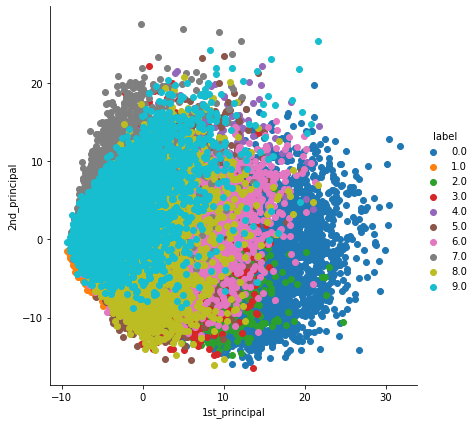

In [15]:
# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_pixels.T, labels)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
print(pca_df.head())
sn.FacetGrid(pca_df, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

## <u> PCA using Scikit Learn (PC = 784)

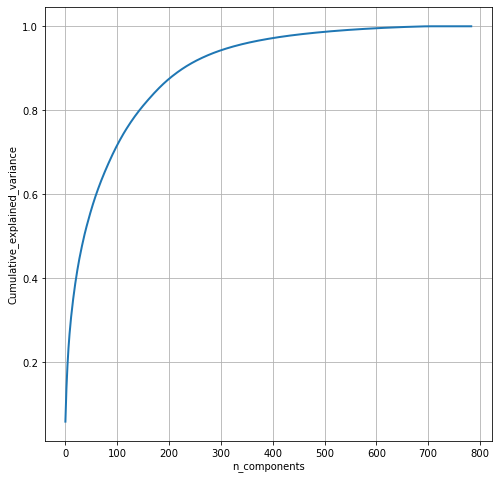

In [16]:
# PCA for dimensionality redcution (non-visualization)

pca.n_components = 784
pca_pixels = pca.fit_transform(std_pixels)

#To calculate for each Lambda i how much variance we are able to capture
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(8, 8))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)

plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


# If we take 200-dimensions, approx. 90% of variance is expalined.
# THUS WE CAN CHOOSE OUR PREFFERED NO OF EIGEN VALUES TO USE IN OUR PROBLEM

## <u> t-SNE using Scikit-Learn

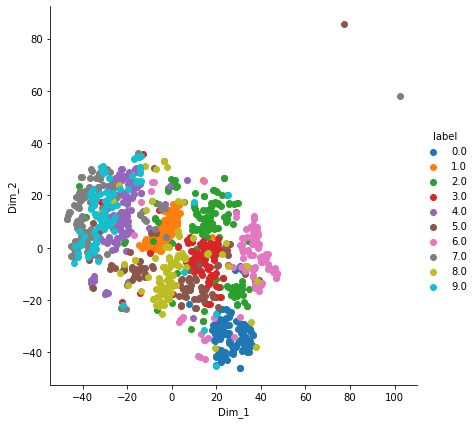

In [17]:

from sklearn.manifold import TSNE

# Picking the top 1000 points as TSNE takes a lot of time for 15K points

data_1000 = std_pixels[0:1000,:]
labels_1000 = labels[0:1000]

model = TSNE(n_components=2, random_state=0)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(data_1000)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

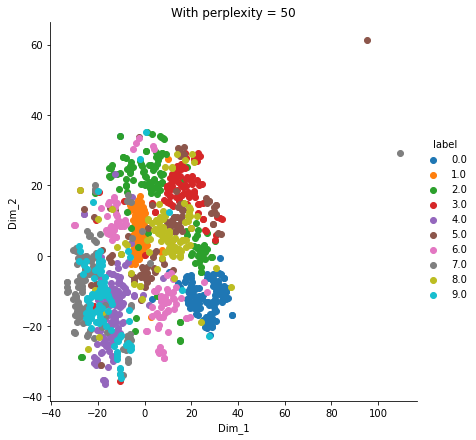

In [21]:
# OBSERVATION for INCREASED PERPLEXITY

#PERPLEXITY from 30 -> 50
model = TSNE(n_components=2, random_state=0, perplexity=50)
tsne_data = model.fit_transform(data_1000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50')
plt.show()

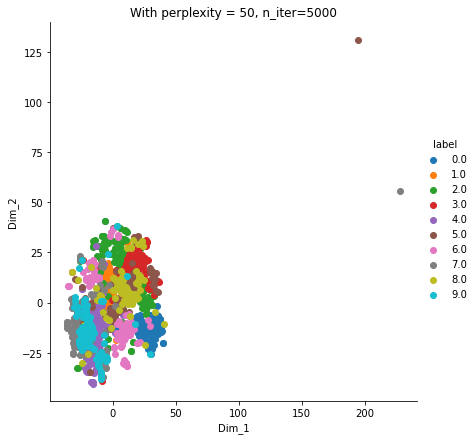

In [22]:
# OBSERVATION for INCREASED ITERATIONS

#ITERATIONS from 1000 -> 5000
model = TSNE(n_components=2, random_state=0, perplexity=50,  n_iter=5000)
tsne_data = model.fit_transform(data_1000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50, n_iter=5000')
plt.show()

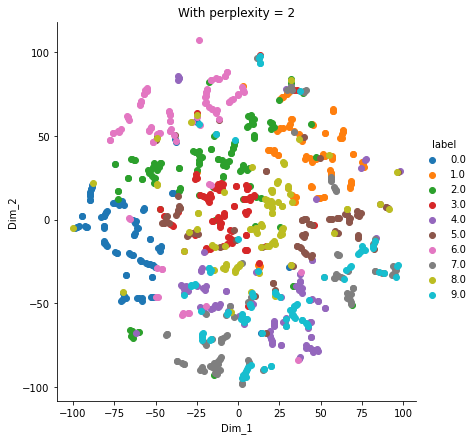

In [23]:
# OBSERVATION for DECREASED PERPLEXITY

#PERPLEXITY from 30 -> 2
model = TSNE(n_components=2, random_state=0, perplexity=2)
tsne_data = model.fit_transform(data_1000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 2')
plt.show()